# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [72]:
def f(t, theta):
    return -2.2067e-12 * (theta**4 - 81e8)

def RungeKutta2(t_0, theta_0, h, t_target):
    num_steps = int((t_target - t_0) / h)
    t = t_0
    theta = theta_0
    for _ in range(num_steps):
        k1 = f(t, theta)
        k2 = f(t + h, theta + k1 * h)
        theta = theta + (1/2) * (k1 + k2) * h
        t += h

    return theta

t_0 = 0
theta_0 = 1200
h = 240
t_target = 480

temperature_at_t_480s = RungeKutta2(t_0, theta_0, h, t_target)

In [73]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480)}K')

Temperature at t = 480s with step size h = 240s is 584.2684867703111K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [74]:
from scipy.optimize import fsolve
import numpy as np

from scipy.optimize import fsolve
import numpy as np

def nonlinear_equation(θ, t):
    return 0.92593 * np.log((θ - 300) / (θ + 300)) - 1.8519 * np.arctan(0.333e-2 * θ) + 0.22067e-3 * t + 2.9282

t = 480

initial_guess = 600
exact_solution = fsolve(nonlinear_equation, initial_guess, args=(t,))[0]

print("Exact solution at t=480 seconds:", exact_solution)

Exact solution at t=480 seconds: 646.4958666612821


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [75]:
step_sizes = [480, 240, 120, 60, 30]
approximations = []

for h in step_sizes:
    approx_value = RungeKutta2(0, 1200, h, 480)
    approximations.append(approx_value)

    global_truncation_error = exact_value - approx_value
    absolute_relative_true_error = abs((exact_value - approx_value) / exact_value) * 100

    print(f'Step size: {h}s, Approximation: {approx_value}K, Global Truncation Error: {global_truncation_error}K, Absolute Relative True Error: {absolute_relative_true_error}%')


Step size: 480s, Approximation: -393.86949676856057K, Global Truncation Error: 1040.3653634298441K, Absolute Relative True Error: 160.92374554575755%
Step size: 240s, Approximation: 584.2684867703111K, Global Truncation Error: 62.22737989097243K, Absolute Relative True Error: 9.625332983540174%
Step size: 120s, Approximation: 651.3490897129784K, Global Truncation Error: -4.85322305169484K, Absolute Relative True Error: 0.7506966868571757%
Step size: 60s, Approximation: 649.9135621424234K, Global Truncation Error: -3.4176954811398446K, Absolute Relative True Error: 0.5286492392890219%
Step size: 30s, Approximation: 648.2051155772971K, Global Truncation Error: -1.7092489160135074K, Absolute Relative True Error: 0.26438667347412886%


Your values should approximately match the values of this table.
<br>
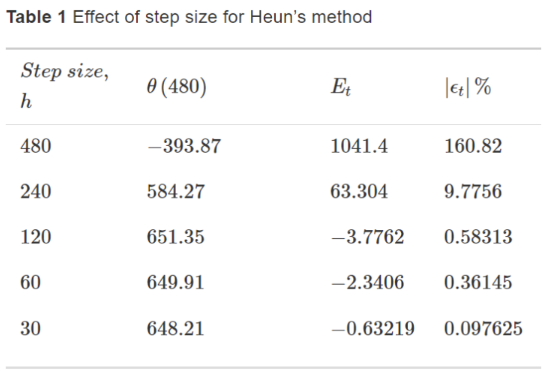

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

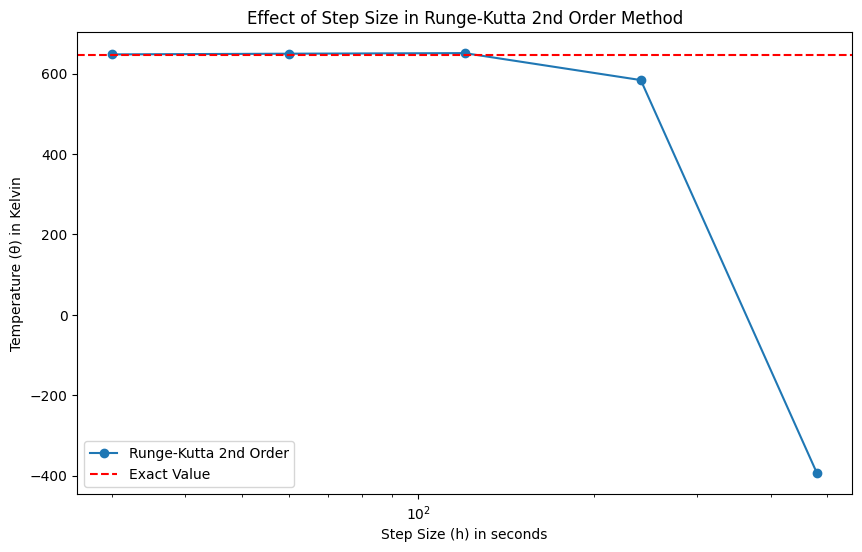

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(step_sizes, approximations, marker='o', label='Runge-Kutta 2nd Order')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Step Size (h) in seconds')
plt.ylabel('Temperature (θ) in Kelvin')
plt.title('Effect of Step Size in Runge-Kutta 2nd Order Method')
plt.legend()
plt.show()

Your graph should look something like,
<br>
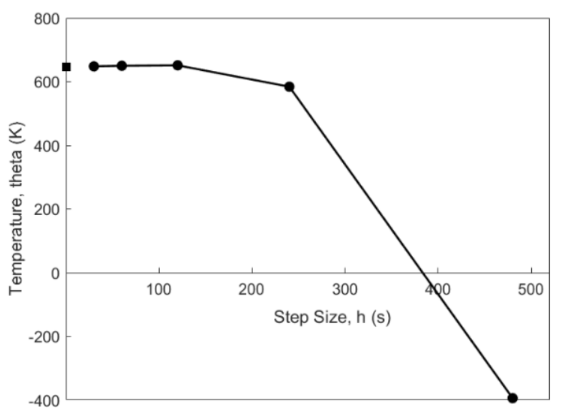

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

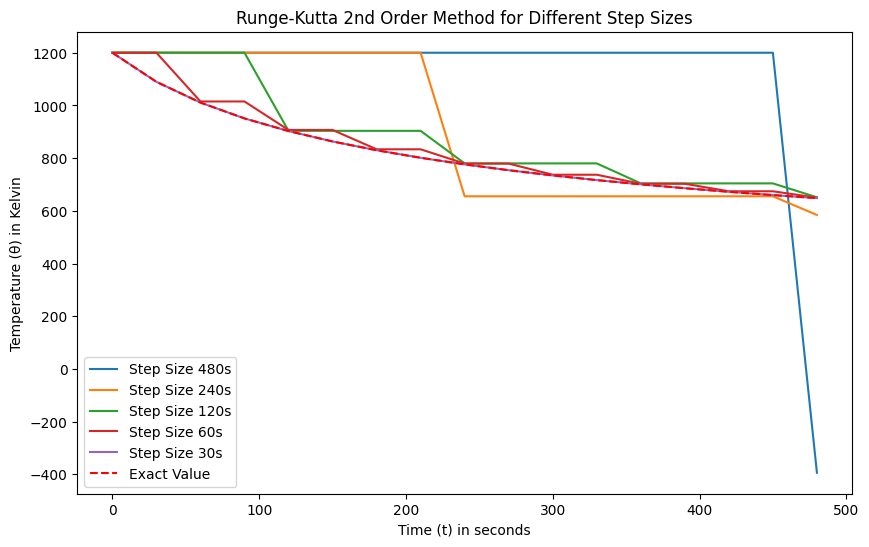

In [77]:
# Write your code here.
time_values = np.linspace(0, 480, int(480/30) + 1)
exact_values = [RungeKutta2(0, 1200, 30, t) for t in time_values]

plt.figure(figsize=(10, 6))
for h in step_sizes:
    approx_values = [RungeKutta2(0, 1200, h, t) for t in time_values]
    plt.plot(time_values, approx_values, label=f'Step Size {h}s')

plt.plot(time_values, exact_values, linestyle='--', color='r', label='Exact Value')
plt.xlabel('Time (t) in seconds')
plt.ylabel('Temperature (θ) in Kelvin')
plt.title('Runge-Kutta 2nd Order Method for Different Step Sizes')
plt.legend()
plt.show()

Your graph should look something like,
<br>
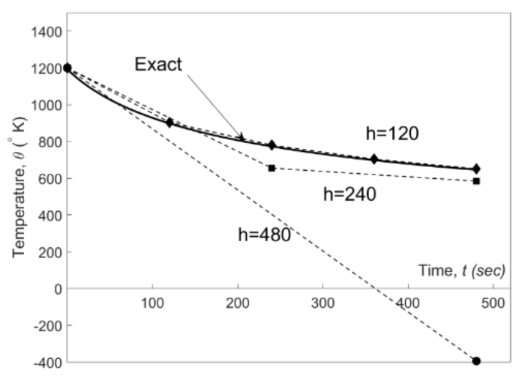